In [230]:
import csv
import pandas as pd
import numpy as np
import json
import tweepy
import time
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [231]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [232]:
from config import consumer_key
from config import consumer_secret
from config import access_token
from config import access_token_secret

In [233]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [234]:
News_accounts = ['BBCNews', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [235]:
data = []

for user in News_accounts:
    counter=1
    time.sleep(.5)
    for page in tweepy.Cursor(api.user_timeline, id=user, count=20).pages(5):
        time.sleep(.1)
        for t in page:
            tweet=t._json
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            data.append({"Tweet":tweet["text"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "tweet ago":counter,
                               "account":tweet["user"]["name"]})

            counter +=1
          

In [236]:
data_pd = pd.DataFrame.from_dict(data)
data_pd.to_csv('./dataframe.csv')

In [237]:
data_pd.head()

,Compound,Negative,Neutral,Positive,Tweet,account,tweet ago
0,-0.7096,0.459,0.541,0.0,Schools cutting posts amid 'funding catastroph...,BBC News (UK),1
1,-0.6249,0.687,0.313,0.0,Met Police chief: Social media leads children ...,BBC News (UK),2
2,0.0000,1.000,0.000,0.0,Stansted Airport: Flights to resume after canc...,BBC News (UK),3
3,-0.3182,0.777,0.223,0.0,Islamic State 'Beatles' duo: Loss of citizensh...,BBC News (UK),4
4,0.0000,1.000,0.000,0.0,Paramedics set to prescribe medicines https://...,BBC News (UK),5


In [238]:
BBC=data_pd[data_pd["account"]=='BBC News (UK)']
CBS = data_pd[data_pd['account']=='CBS News']
CNN = data_pd[data_pd['account']=='CNN']
FOX = data_pd[data_pd['account']=='Fox News']
NYTimes = data_pd[data_pd['account']=='The New York Times']

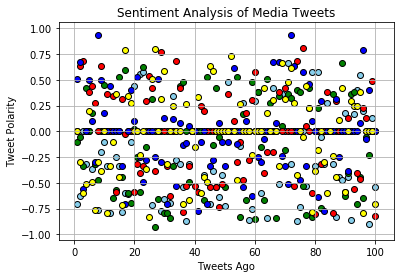

In [245]:
plt.scatter(x=BBC['tweet ago'], y=BBC['Compound'], c='skyblue',edgecolors='black')
plt.scatter(x=CBS['tweet ago'], y=CBS['Compound'], c='green',edgecolors='black')
plt.scatter(x=CNN['tweet ago'], y=CNN['Compound'], c='red',edgecolors='black')
plt.scatter(x=FOX['tweet ago'], y=FOX['Compound'], c='blue',edgecolors='black')
plt.scatter(x=NYTimes['tweet ago'], y=NYTimes['Compound'], c='yellow',edgecolors='black')
plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)
plt.savefig('Analysis_all_5accounts.png')
plt.show()

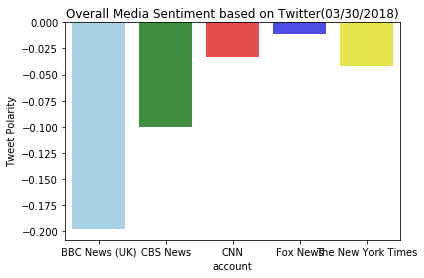

In [244]:
overal=data_pd.groupby(['account']).mean()['Compound']
overal=overal.reset_index('account')
sns.barplot(y=overal['Compound'], x=overal['account'], data=overal,
            palette={"BBC News (UK)":"skyblue", "CBS News":"green", "CNN":"red", "Fox News":"blue", "The New York Times":"yellow"},
            alpha=0.8, linewidth=1,)
plt.title("Overall Media Sentiment based on Twitter(03/30/2018)")
plt.ylabel("Tweet Polarity")
plt.savefig('OverallSentiment.png')
plt.show()


In [246]:
!pwd

/Users/elham/Desktop/Bootcamp/UCBBEL201801DATA5-Class-Repository-DATA/07-Social_Analytics/Homework/Instructions
